####  ПРОЕКТ РАЗВЕДЫВАТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ (EDA)

Цель - отследить влияние условий жизни учащихся на их неуспеваемость по математике

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
from itertools import combinations

df1 = pd.read_csv('stud_math.csv')

In [2]:
def display_all(df):     # display all columns  or all raws
   with pd.option_context('display.max_rows', 30): # change number of rows accordingly
      with pd.option_context('display.max_columns', None): # change number of columns accordingly
          display(df)

def col_info(col):  # for df1! value_counts, NaN, unique
    display(pd.DataFrame(df1[col].value_counts(sort=True, dropna=False)))
    print("пустых значений в столбце ",  col, " = ", df1[col].isna().sum(), 
          ",  в процентах = ", "{0:.0%}".format(df1[col].isna().sum() / len(df1)))
    print("уникальных значений в столбце ", col, " = ", df1[col].nunique(dropna=False))
    
def missing_values_table(df):
    mv = df.isnull().sum()
    mvp = 100 * df.isnull().sum() / len(df)
    mv_table = pd.concat([mv, mvp], axis=1)
    mv_table2 = mv_table.rename(columns = {0 : 'NaN', 1 : '% NaN'})
    mv_table2 = mv_table2[mv_table2.iloc[:,1] >= 0].round(1)
    return mv_table2

def get_stat_dif(column):
    cols = df1.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df1.loc[df1.loc[:, column] == comb[0], 'rating'], 
                        df1.loc[df1.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки = ', column)
            break

### 01. просмотр таблицы и данных

In [3]:
print(df1.shape)
display_all(df1.head(10))

(395, 30)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
print(df1.columns.tolist()) # список исходных названий столбцов

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']


#### исходные типы данных и названия столбцов

In [6]:
C00 = 'school', 'school type', 'GP or MS'
C01 = 'sex', 'student gender', 'F or M'
C02 = 'age', 'student age', '16 - 21 years'
C03 = 'address', 'тип адреса - Urban or Rural;', 'U or R'
C04 = 'famsize', 'family size размер семьи', 'LE3 <= 3 or GT3 > 3'
C05 = 'Pstatus', 'родители живут вместе или нет', 'T-together or Apart'
C06 = 'Medu', 'mother eduction', '0 нет, 1 4класса, 2 5-9кл, 3 спец или 11кл, 4 высшее'
C07 = 'Fedu', 'father eduction', '0 нет, 1 4класса, 2 5-9кл, 3 спец или 11кл, 4 высшее'
C08 = 'Mjob', 'mother job', 'teacher, health, services, at_home, other'
C09 = 'Fjob', 'father job', 'teacher, health, services, at_home, other'
C10 = 'reason', 'выбор школы', 'home близость к дому, reputation, course тип программы, other'
C11 = 'guardian', 'кто опекун', 'mother, father, other'
C12 = 'traveltime', 'время в пути до школы', '1 <15мин, 2 15-30мин, 3 30-60мин, 4 >60мин'
C13 = 'studytime', 'время на учёбу помимо школы в неделю', '1 <2ч, 2 2-5ч, 3 5-10ч, 4 >10ч'
C14 = 'failures', 'количество внеучебных неудач', 'n, если 1<=n<=3, иначе 0'
C15 = 'schoolsup', 'дополнительная образовательная поддержка', 'yes, no'
C16 = 'famsup', ' семейная образовательная поддержка', 'yes, no'
C17 = 'paid', 'доп. платные занятия', 'yes, no'
C18 = 'activities', 'доп. внеучебные занятия', 'yes, no'
C19 = 'nursery', 'подготовка до школы', 'yes, no'
C20 = 'studytime, granular', 'no description', 'minus 3, minus 6, minus 9, minus 12'
C21 = 'higher', ' хочет получить высшее образование', 'yes, no'
C22 = 'internet', 'наличие интернета дома', 'yes, no'
C23 = 'romantic', 'в романтических отношениях', 'yes, no'
C24 = 'famrel', 'семейные отношения', 'от 1 - плохо до 5 - хорошо'
C25 = 'freetime', 'свободное время после школы', 'от 1 - мало до 5 - много'
C26 = 'goout', 'проведение времени с друзьями', 'от 1 - мало до 5 - много'
C27 = 'health', 'состояние здоровья', 'от 1 - плохо до 5 - хорошо'
C28 = 'absences', 'количество пропущенных занятий', 'number'
C29 = 'score', 'баллы по экзамену', 'number from 0 to 100'

#### переименование столбцов для удобства работы

In [7]:
df1.set_axis(["S"+str(i).zfill(2) for i in range(0, df1.shape[1])], axis=1, inplace=True)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S00     395 non-null    object 
 1   S01     395 non-null    object 
 2   S02     395 non-null    int64  
 3   S03     378 non-null    object 
 4   S04     368 non-null    object 
 5   S05     350 non-null    object 
 6   S06     392 non-null    float64
 7   S07     371 non-null    float64
 8   S08     376 non-null    object 
 9   S09     359 non-null    object 
 10  S10     378 non-null    object 
 11  S11     364 non-null    object 
 12  S12     367 non-null    float64
 13  S13     388 non-null    float64
 14  S14     373 non-null    float64
 15  S15     386 non-null    object 
 16  S16     356 non-null    object 
 17  S17     355 non-null    object 
 18  S18     381 non-null    object 
 19  S19     379 non-null    object 
 20  S20     388 non-null    float64
 21  S21     375 non-null    object 
 22  S2

### 02. первичный просмотр данных в столбцах

#### столбец S00  'school'

In [8]:
col_info('S00')
print("описание столбца:", C00)

,S00
GP,349
MS,46


пустых значений в столбце  S00  =  0 ,  в процентах =  0%
уникальных значений в столбце  S00  =  2
описание столбца: ('school', 'school type', 'GP or MS')


#### столбец S01 'sex'

In [9]:
col_info('S01')
print("описание столбца:", C01)

,S01
F,208
M,187


пустых значений в столбце  S01  =  0 ,  в процентах =  0%
уникальных значений в столбце  S01  =  2
описание столбца: ('sex', 'student gender', 'F or M')


#### столбец S02 'age'

In [10]:
col_info('S02')
print("описание столбца:", C02)

,S02
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


пустых значений в столбце  S02  =  0 ,  в процентах =  0%
уникальных значений в столбце  S02  =  8
описание столбца: ('age', 'student age', '16 - 21 years')


#### столбец S03 'address'

In [11]:
col_info('S03')
print("описание столбца:", C03)

,S03
U,295
R,83
NaN,17


пустых значений в столбце  S03  =  17 ,  в процентах =  4%
уникальных значений в столбце  S03  =  3
описание столбца: ('address', 'тип адреса - Urban or Rural;', 'U or R')


#### столбец S04 'famsize'

In [12]:
col_info('S04')
print("описание столбца:", C04)

,S04
GT3,261
LE3,107
NaN,27


пустых значений в столбце  S04  =  27 ,  в процентах =  7%
уникальных значений в столбце  S04  =  3
описание столбца: ('famsize', 'family size размер семьи', 'LE3 <= 3 or GT3 > 3')


#### столбец S05 'Pstatus'

In [13]:
col_info('S05')
print("описание столбца:", C05)

,S05
T,314
NaN,45
A,36


пустых значений в столбце  S05  =  45 ,  в процентах =  11%
уникальных значений в столбце  S05  =  3
описание столбца: ('Pstatus', 'родители живут вместе или нет', 'T-together or Apart')


#### столбец S06 'Medu'

In [14]:
col_info('S06')
print("описание столбца:", C06)

,S06
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


пустых значений в столбце  S06  =  3 ,  в процентах =  1%
уникальных значений в столбце  S06  =  6
описание столбца: ('Medu', 'mother eduction', '0 нет, 1 4класса, 2 5-9кл, 3 спец или 11кл, 4 высшее')


#### столбец S07 'Fedu'

In [15]:
col_info('S07')
print("описание столбца:", C07)

,S07
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


пустых значений в столбце  S07  =  24 ,  в процентах =  6%
уникальных значений в столбце  S07  =  7
описание столбца: ('Fedu', 'father eduction', '0 нет, 1 4класса, 2 5-9кл, 3 спец или 11кл, 4 высшее')


In [16]:
df1.S07 = np.where((df1.S07 == 40), 4, df1.S07)

#### столбец S08 'Mjob'

In [17]:
col_info('S08')
print("описание столбца:", C08)

,S08
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


пустых значений в столбце  S08  =  19 ,  в процентах =  5%
уникальных значений в столбце  S08  =  6
описание столбца: ('Mjob', 'mother job', 'teacher, health, services, at_home, other')


#### столбец S09 'Fjob'

In [18]:
col_info('S09')
print("описание столбца:", C09)

,S09
other,197
services,102
NaN,36
teacher,29
at_home,16
health,15


пустых значений в столбце  S09  =  36 ,  в процентах =  9%
уникальных значений в столбце  S09  =  6
описание столбца: ('Fjob', 'father job', 'teacher, health, services, at_home, other')


#### столбец S10 'reason'

In [19]:
col_info('S10')
print("описание столбца:", C10)

,S10
course,137
home,104
reputation,103
other,34
NaN,17


пустых значений в столбце  S10  =  17 ,  в процентах =  4%
уникальных значений в столбце  S10  =  5
описание столбца: ('reason', 'выбор школы', 'home близость к дому, reputation, course тип программы, other')


#### столбец S11 'guardian'

In [20]:
col_info('S11')
print("описание столбца:", C11)

,S11
mother,250
father,86
NaN,31
other,28


пустых значений в столбце  S11  =  31 ,  в процентах =  8%
уникальных значений в столбце  S11  =  4
описание столбца: ('guardian', 'кто опекун', 'mother, father, other')


#### столбец S12 'traveltime'

In [21]:
col_info('S12')
print("описание столбца:", C12)

,S12
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


пустых значений в столбце  S12  =  28 ,  в процентах =  7%
уникальных значений в столбце  S12  =  5
описание столбца: ('traveltime', 'время в пути до школы', '1 <15мин, 2 15-30мин, 3 30-60мин, 4 >60мин')


#### столбец S13 'studytime'

In [22]:
col_info('S13')
print("описание столбца:", C13)

,S13
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


пустых значений в столбце  S13  =  7 ,  в процентах =  2%
уникальных значений в столбце  S13  =  5
описание столбца: ('studytime', 'время на учёбу помимо школы в неделю', '1 <2ч, 2 2-5ч, 3 5-10ч, 4 >10ч')


#### столбец S14 'failures'

In [23]:
col_info('S14')
print("описание столбца:", C14)

,S14
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


пустых значений в столбце  S14  =  22 ,  в процентах =  6%
уникальных значений в столбце  S14  =  5
описание столбца: ('failures', 'количество внеучебных неудач', 'n, если 1<=n<=3, иначе 0')


#### столбец S15 'schoolsup'

In [24]:
col_info('S15')
print("описание столбца:", C15)

,S15
no,335
yes,51
NaN,9


пустых значений в столбце  S15  =  9 ,  в процентах =  2%
уникальных значений в столбце  S15  =  3
описание столбца: ('schoolsup', 'дополнительная образовательная поддержка', 'yes, no')


#### столбец S16 'famsup'

In [25]:
col_info('S16')
print("описание столбца:", C16)

,S16
yes,219
no,137
NaN,39


пустых значений в столбце  S16  =  39 ,  в процентах =  10%
уникальных значений в столбце  S16  =  3
описание столбца: ('famsup', ' семейная образовательная поддержка', 'yes, no')


#### столбец S17 'paid'

In [26]:
col_info('S17')
print("описание столбца:", C17)

,S17
no,200
yes,155
NaN,40


пустых значений в столбце  S17  =  40 ,  в процентах =  10%
уникальных значений в столбце  S17  =  3
описание столбца: ('paid', 'доп. платные занятия', 'yes, no')


#### столбец S18 'activities'

In [27]:
col_info('S18')
print("описание столбца:", C18)

,S18
yes,195
no,186
NaN,14


пустых значений в столбце  S18  =  14 ,  в процентах =  4%
уникальных значений в столбце  S18  =  3
описание столбца: ('activities', 'доп. внеучебные занятия', 'yes, no')


#### столбец S19 'nursery'

In [28]:
col_info('S19')
print("описание столбца:", C19)

,S19
yes,300
no,79
NaN,16


пустых значений в столбце  S19  =  16 ,  в процентах =  4%
уникальных значений в столбце  S19  =  3
описание столбца: ('nursery', 'подготовка до школы', 'yes, no')


#### столбец  S20 'studytime, granular'

In [29]:
col_info('S20')
print("описание столбца:", C20)

,S20
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7


пустых значений в столбце  S20  =  7 ,  в процентах =  2%
уникальных значений в столбце  S20  =  5
описание столбца: ('studytime, granular', 'no description', 'minus 3, minus 6, minus 9, minus 12')


#### столбец S21 'higher'

In [30]:
col_info('S21')
print("описание столбца:", C21)

,S21
yes,356
NaN,20
no,19


пустых значений в столбце  S21  =  20 ,  в процентах =  5%
уникальных значений в столбце  S21  =  3
описание столбца: ('higher', ' хочет получить высшее образование', 'yes, no')


#### столбец S22 'internet'

In [31]:
col_info('S23')
print("описание столбца:", C23)

,S23
no,240
yes,124
NaN,31


пустых значений в столбце  S23  =  31 ,  в процентах =  8%
уникальных значений в столбце  S23  =  3
описание столбца: ('romantic', 'в романтических отношениях', 'yes, no')


#### столбец S23 'romantic'

In [32]:
col_info('S22')
print("описание столбца:", C22)

,S22
yes,305
no,56
NaN,34


пустых значений в столбце  S22  =  34 ,  в процентах =  9%
уникальных значений в столбце  S22  =  3
описание столбца: ('internet', 'наличие интернета дома', 'yes, no')


#### столбец S24 'famrel'

In [33]:
col_info('S24')
print("описание столбца:", C24)

,S24
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


пустых значений в столбце  S24  =  27 ,  в процентах =  7%
уникальных значений в столбце  S24  =  7
описание столбца: ('famrel', 'семейные отношения', 'от 1 - плохо до 5 - хорошо')


In [34]:
df1.S24 = np.where((df1.S24 == -1), 1, df1.S24) # manual value replace

#### столбец S25 'freetime'

In [35]:
col_info('S25')
print("описание столбца:", C25)

,S25
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


пустых значений в столбце  S25  =  11 ,  в процентах =  3%
уникальных значений в столбце  S25  =  6
описание столбца: ('freetime', 'свободное время после школы', 'от 1 - мало до 5 - много')


#### столбец S26 'goout'

In [36]:
col_info('S26')
print("описание столбца:", C26)

,S26
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


пустых значений в столбце  S26  =  8 ,  в процентах =  2%
уникальных значений в столбце  S26  =  6
описание столбца: ('goout', 'проведение времени с друзьями', 'от 1 - мало до 5 - много')


#### столбец S27 'health'

In [37]:
col_info('S27')
print("описание столбца:", C27)

,S27
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


пустых значений в столбце  S27  =  15 ,  в процентах =  4%
уникальных значений в столбце  S27  =  6
описание столбца: ('health', 'состояние здоровья', 'от 1 - плохо до 5 - хорошо')


#### столбец S28 'absences'

In [38]:
col_info('S28')
print("описание столбца:", C28)

,S28
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
NaN,12
14.0,12
3.0,8


пустых значений в столбце  S28  =  12 ,  в процентах =  3%
уникальных значений в столбце  S28  =  37
описание столбца: ('absences', 'количество пропущенных занятий', 'number')


#### столбец S29  - ЦЕЛЕВОЕ ЗНАЧЕНИЕ ('score',  float64)

In [39]:
col_info('S29')
print("описание столбца:", C29)

,S29
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
45.0,27
70.0,27
80.0,16


пустых значений в столбце  S29  =  6 ,  в процентах =  2%
уникальных значений в столбце  S29  =  19
описание столбца: ('score', 'баллы по экзамену', 'number from 0 to 100')


In [40]:
df1 = df1[df1.S29.notna()]  # 6 NaN rows removed

### 03. список типов данных в столбцах

### 04. анализ и подготовка  данных в количественных столбцах

####  столбец S29  - ЦЕЛЕВОЕ ЗНАЧЕНИЕ ('score')

<AxesSubplot:xlabel='S29', ylabel='Count'>

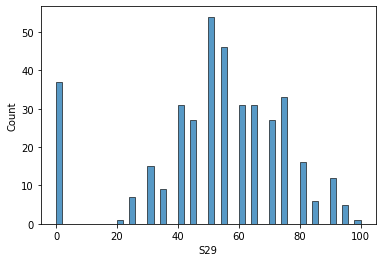

In [41]:
sns.histplot(data=df1.S29, bins=50,)

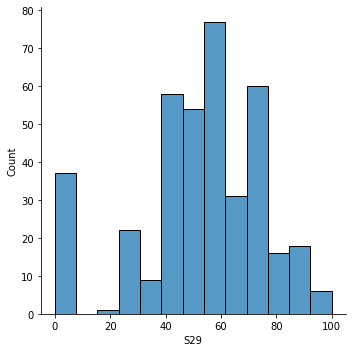

In [42]:
sns.displot(df1, x="S29", kind="hist")

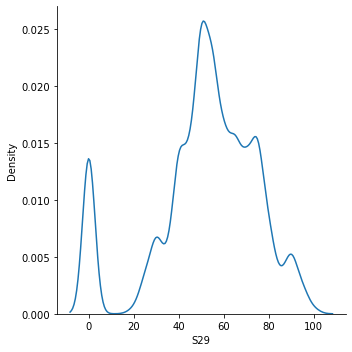

In [43]:
sns.displot(df1, x="S29", kind="kde", bw_adjust=.4)

In [44]:
IQR = df1.S29.quantile(0.75) - df1.S29.quantile(0.25)
perc25 = df1.S29.quantile(0.25)
perc75 = df1.S29.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


In [45]:
df2 = df1.loc[df1.S29.between(10, 101)]  # df2 = где значения S29 меньше 10 удалены

####  столбец S02  'age'

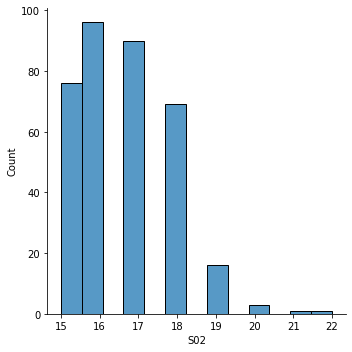

In [46]:
sns.displot(df2, x="S02", kind="hist")

####  столбец S06  'Medu'

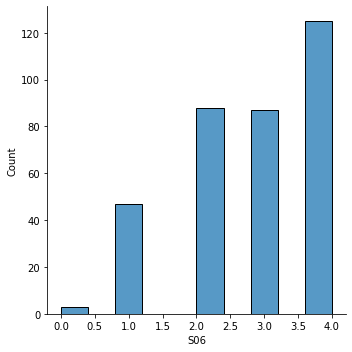

In [47]:
sns.displot(df2, x="S06", kind="hist")

In [48]:
col_info('S06')

,S06
4.0,131
2.0,100
3.0,96
1.0,56
0.0,3
NaN,3


пустых значений в столбце  S06  =  3 ,  в процентах =  1%
уникальных значений в столбце  S06  =  6


####  столбец S07  'Fedu'

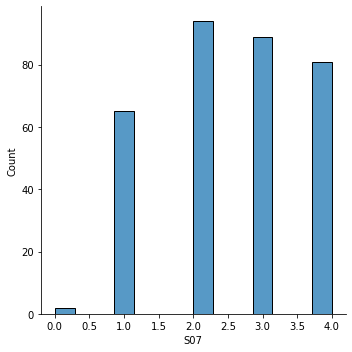

In [49]:
sns.displot(df2, x="S07", kind="hist")

####  столбец S12  'traveltime'

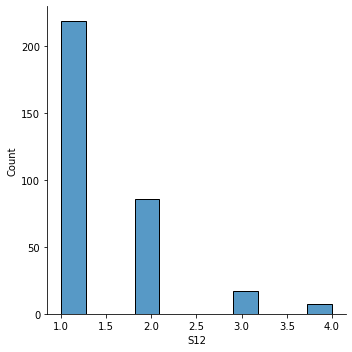

In [50]:
sns.displot(df2, x="S12", kind="hist")

####  столбец S13  'studytime'

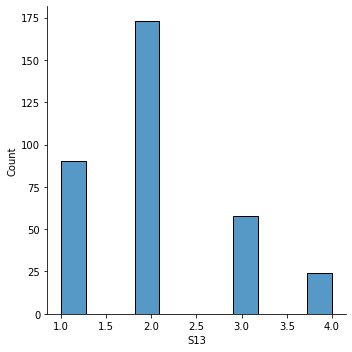

In [51]:
sns.displot(df2, x="S13", kind="hist")

####  столбец S14  'failures'

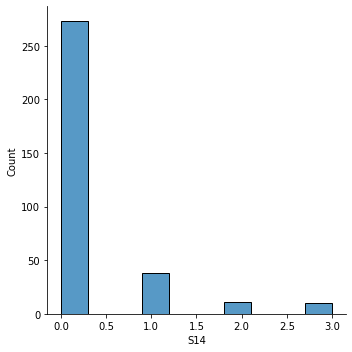

In [52]:
sns.displot(df2, x="S14", kind="hist")

####  столбец S20  'studytime granular'

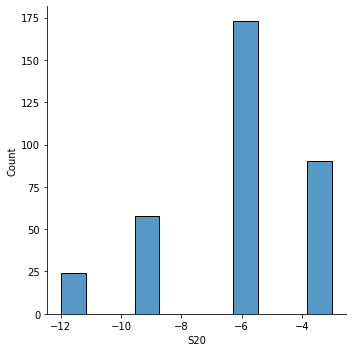

In [53]:
sns.displot(df2, x="S20", kind="hist")

####  столбец S24  'famrel'

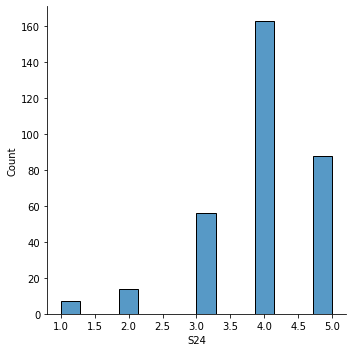

In [54]:
sns.displot(df2, x="S24", kind="hist")

####  столбец S25  'goout'

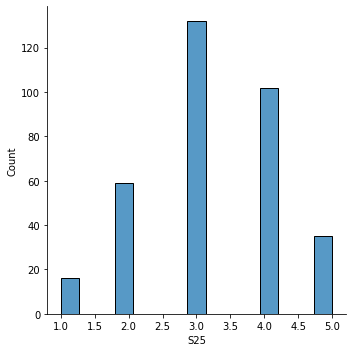

In [55]:
sns.displot(df2, x="S25", kind="hist")

#### столбец S27 'health'

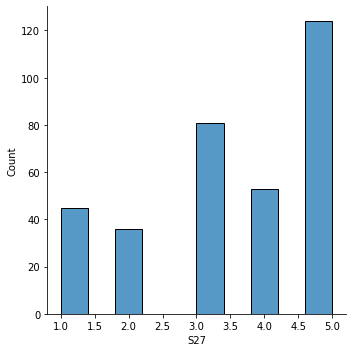

In [56]:
sns.displot(df2, x="S27", kind="hist")

####  столбец S28  'absences'

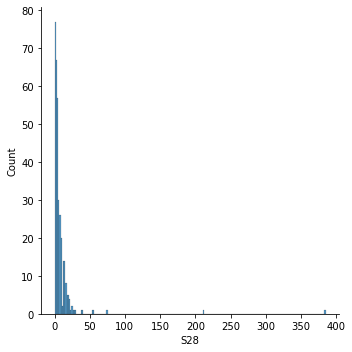

In [57]:
sns.displot(df2, x="S28", kind="hist")

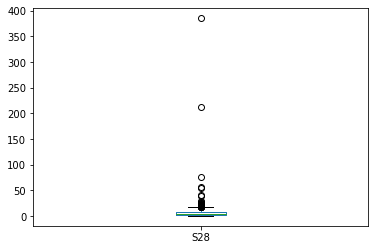

In [58]:
ax = df2.S28.plot.box()

In [59]:
col_info('S28')

,S28
0.0,110
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
NaN,11
16.0,7


пустых значений в столбце  S28  =  11 ,  в процентах =  3%
уникальных значений в столбце  S28  =  37


<AxesSubplot:xlabel='S28', ylabel='S29'>

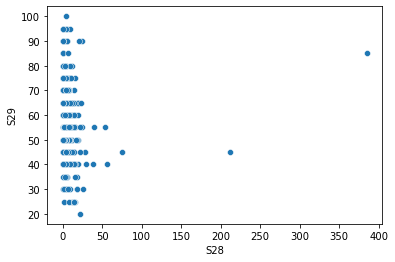

In [60]:
sns.scatterplot(data=df2, x="S28", y="S29")

In [61]:
df2.S28 = np.where((df2.S28 > 150), np.nan, df2.S28) # замена выбросов на NaN

<AxesSubplot:xlabel='S28', ylabel='S29'>

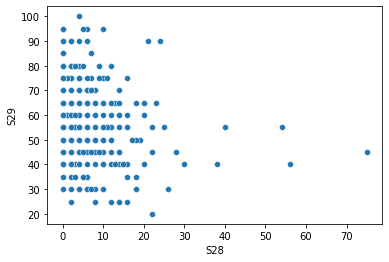

In [62]:
sns.scatterplot(data=df2, x="S28", y="S29")

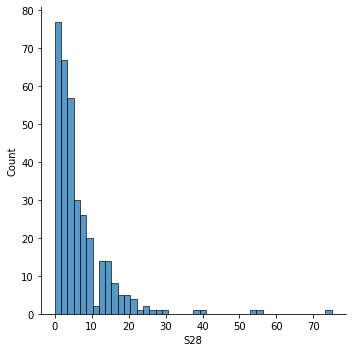

In [63]:
sns.displot(df2, x="S28", kind="hist")

### 05. корреляционный анализ количественных столбцов

In [64]:
df_m = df2.corr(method ='spearman')
df_m.style.background_gradient(cmap='rainbow').set_precision(2).set_caption('method Spearman')

,S02,S06,S07,S12,S13,S14,S20,S24,S25,S26,S27,S28,S29
S02,1.00,-0.12,-0.10,0.14,0.02,0.20,-0.02,0.04,-0.02,0.14,-0.07,0.21,-0.14
S06,-0.12,1.00,0.61,-0.14,0.07,-0.20,-0.07,0.01,0.03,0.08,-0.03,0.06,0.19
S07,-0.10,0.61,1.00,-0.13,0.02,-0.24,-0.02,0.00,-0.03,0.06,0.02,0.00,0.14
S12,0.14,-0.14,-0.13,1.00,-0.11,0.07,0.11,-0.05,-0.03,0.00,-0.03,-0.02,-0.07
S13,0.02,0.07,0.02,-0.11,1.00,-0.15,-1.00,0.07,-0.11,-0.04,-0.10,-0.07,0.12
S14,0.20,-0.20,-0.24,0.07,-0.15,1.00,0.15,0.00,0.13,0.14,0.09,0.24,-0.30
S20,-0.02,-0.07,-0.02,0.11,-1.00,0.15,1.00,-0.07,0.11,0.04,0.10,0.07,-0.12
S24,0.04,0.01,0.00,-0.05,0.07,0.00,-0.07,1.00,0.15,0.04,0.09,-0.10,0.06
S25,-0.02,0.03,-0.03,-0.03,-0.11,0.13,0.11,0.15,1.00,0.29,0.09,0.00,-0.02
S26,0.14,0.08,0.06,0.00,-0.04,0.14,0.04,0.04,0.29,1.00,-0.01,0.15,-0.19


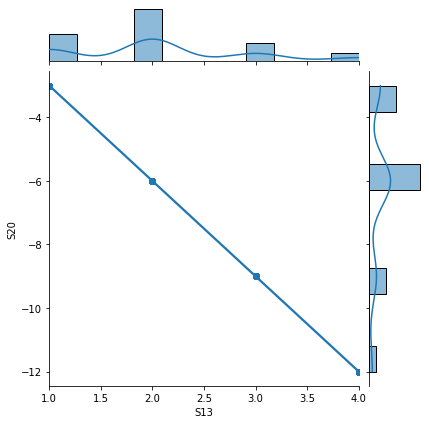

In [65]:
sns.jointplot(x="S13", y="S20", height=6, dropna=True, data=df2, kind='reg')

#### корреляция между целевым и числовыми параметрами

In [66]:
df_m = df2.corr(method ='spearman')
most_correlated = df_m.abs()['S29'].sort_values(ascending=False)
print(most_correlated.head(8).round(2))

S29    1.00
S14    0.30
S28    0.24
S26    0.19
S06    0.19
S07    0.14
S02    0.14
S20    0.12
Name: S29, dtype: float64


In [67]:
df_m = df2.corr(method ='pearson')
most_correlated = df_m.abs()['S29'].sort_values(ascending=False)
print(most_correlated.head(8).round(2))

S29    1.00
S14    0.29
S28    0.21
S06    0.19
S26    0.18
S20    0.14
S13    0.14
S07    0.14
Name: S29, dtype: float64


In [68]:
df_m = df1.corr(method ='spearman')  # если брать все значения S29 'score' включая нулевые отметки
most_correlated = df_m.abs()['S29'].sort_values(ascending=False)
print(most_correlated.head(8).round(2))

S29    1.00
S14    0.35
S06    0.22
S02    0.16
S26    0.16
S07    0.15
S20    0.12
S13    0.12
Name: S29, dtype: float64


In [69]:
df_m = df1.corr(method ='pearson')  # если брать все значения S29 'score' включая нулевые отметки
most_correlated = df_m.abs()['S29'].sort_values(ascending=False)
print(most_correlated.head(8).round(2))

S29    1.00
S14    0.34
S06    0.21
S02    0.16
S07    0.13
S26    0.13
S13    0.12
S20    0.12
Name: S29, dtype: float64


#### ВЫВОД 1: среди количественных следует отобрать 4 параметра
#### S14 'failures', S28 'absences', S06 'Medu', S13 'studytime'   

### 06. анализ всех номинативных столбцов

In [70]:
num_list = ['S02', 'S06', 'S07', 'S12', 'S13', 'S14', 'S20', 
                'S24', 'S25', 'S26', 'S27', 'S28']  # названия количественных столбцов

In [71]:
df4 = df2.drop(num_list, axis=1)  # новый df4 содержит только номинативные столбцы

In [72]:
cat_list1 = ['S08', 'S09', 'S10', 'S11']   # список номинативных НЕ бинарных столбцов

In [73]:
def show_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='S29', 
                data=df4.loc[df4.loc[:, column].isin(df4.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

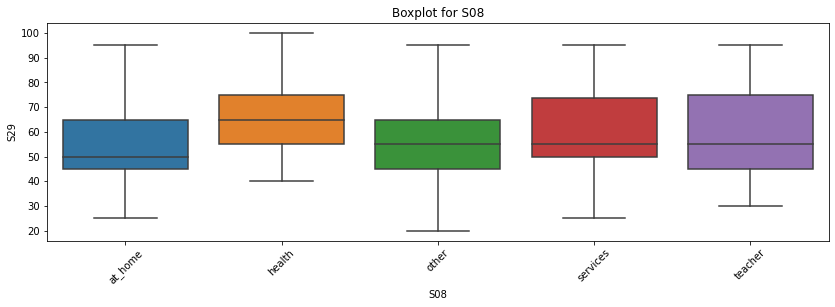

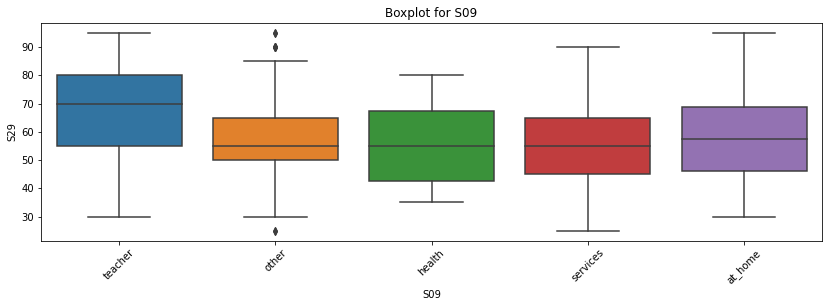

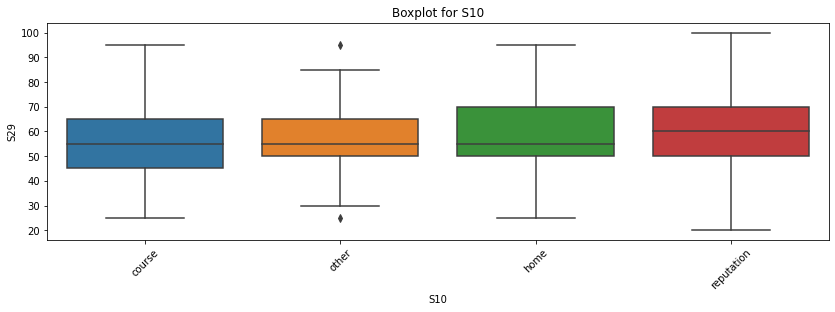

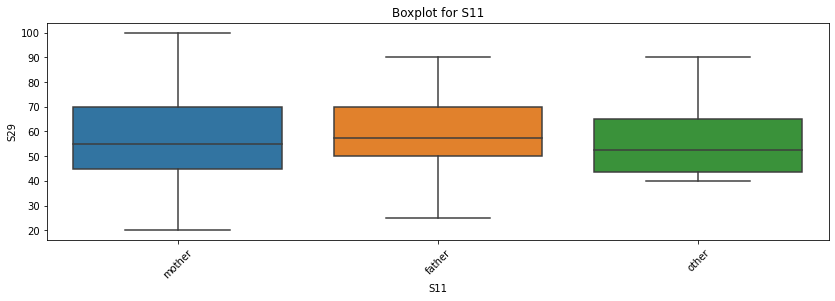

In [74]:
for col in cat_list1:   # оценка номинативных НЕ бинарных столбцов
    show_boxplot(col)

#### явного влияния на целевой показатель нет, есть небольшое в столбце S09 'Fjob' (teacher)

#### тест Стьюдента

In [75]:
def get_stat_dif(column):
    cols = df4.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df4.loc[df4.loc[:, column] == comb[0], 'S29'], 
                        df4.loc[df4.loc[:, column] == comb[1], 'S29']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки = ', column)
            break

In [76]:
cat_list3 = df4.columns.tolist()  # список ВСЕХ номинативных столбцов

In [77]:
for col in cat_list3:   # Т-тест для ВСЕХ номинативных столбцов
    get_stat_dif(col)

Найдены статистически значимые различия для колонки =  S03
Найдены статистически значимые различия для колонки =  S08
Найдены статистически значимые различия для колонки =  S09
Найдены статистически значимые различия для колонки =  S15
Найдены статистически значимые различия для колонки =  S29


#### предварительно отобраны 4 лучших среди ВСЕХ номинативных параметров по t-test :
#### S15 'schoolsup', S03 'address', S08 'Mjob', S09 'Fjob'

### 07. анализ данных в номинативных бинарных столбцах

In [78]:
df3 = df2[['S29', 'S00', 'S01', 'S03', 'S04', 'S05', 'S15', 'S16', 'S17', 'S18', 'S19', 
          'S21', 'S22', 'S23']].copy()  # df3 = только номинативные бинарные параметры

In [79]:
cat_list2 = df3.columns.tolist()
cat_list2.remove('S29') # удаляем целевую переменную из списка
print(cat_list2)

['S00', 'S01', 'S03', 'S04', 'S05', 'S15', 'S16', 'S17', 'S18', 'S19', 'S21', 'S22', 'S23']


#### вычисление point biserial correlation coefficient

In [80]:
def bs_cor(col):  # point biserial correlation
    df_temp = df3[['S29', col]].copy()
    df_temp.dropna(inplace=True)
    df_temp.iloc[:, 1] = pd.Categorical(df_temp.iloc[:, 1])
    df_temp.iloc[:, 1] = pd.factorize(df_temp.iloc[:, 1], sort=True)[0]
    bs = stats.pointbiserialr(df_temp.iloc[:, 1], df_temp['S29'])
    bsc = bs.correlation.round(3)
    print(col, bsc)

In [81]:
for x in cat_list2:
    bs_cor(x)

S00 -0.078
S01 0.102
S03 0.138
S04 0.025
S05 -0.017
S15 -0.25
S16 -0.047
S17 -0.022
S18 0.06
S19 0.03
S21 0.105
S22 0.068
S23 -0.062


#### предварительно отобраны 4 лучших среди номинативных бинарных столбцах по biserial:
#### S15 'schoolsup', S03 'address', S21 'higher', S01 'sex'

#### окончательный выбор 4-х лучших из всех номинативных:
#### S15 'schoolsup', S03 'address', S09 'Fjob', S21 'higher'

### 8. выводы: самые важные параметры, которые предлагается использовать в дальнейшем для построения модели,
### 'failures',  'absences',  'Medu',  'studytime',  'schoolsup',  'address',  'Fjob',  'higher'

In [82]:
df_for_model = df2.loc[:,['S14', 'S28', 'S06', 'S13', 'S15', 'S03', 'S09', 'S21']]